In [38]:
import numpy as np
import pandas as pd
import cv2
#matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import glob
import os
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.cluster import KMeans
import joblib


In [39]:
first_run = False

In [40]:
if first_run:
    X_train = []
    y_train = []
    i = 0
    for fruit_dir_path in glob.glob('fruits-360/Training/*'):
        fruit_label = fruit_dir_path.split("/")[-1]
        for image_path in glob.glob(os.path.join(fruit_dir_path, "*.jpg")):
            image = cv2.imread(image_path, cv2.IMREAD_COLOR)
            
            image = cv2.resize(image, (45, 45))
            image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
            
            X_train.append(image)
            y_train.append(i)
        i = i + 1

    X_train = np.array(X_train)
    y_train = np.array(y_train)


In [41]:
if first_run:
    X_test = []
    y_test = []
    i = 0
    for fruit_dir_path in glob.glob('fruits-360\Test\*'):
        fruit_label = fruit_dir_path.split("/")[-1]
        for image_path in glob.glob(os.path.join(fruit_dir_path, "*.jpg")):
            image = cv2.imread(image_path, cv2.IMREAD_COLOR)
            
            image = cv2.resize(image, (45, 45))
            image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
            
            X_test.append(image)
            y_test.append(i)
        i = i + 1

    X_test = np.array(X_test)
    y_test = np.array(y_test)

In [42]:
if first_run:
    print(X_train.shape)
    print(y_train.shape)

    print(X_test.shape)
    print(y_test.shape)

In [43]:
if first_run:
    X_train = X_train.reshape(67692, 2025)
    X_test = X_test.reshape(22688, 2025)

In [44]:
if first_run:
    jolib.dump('tam/X_train')
    jolib.dump('tam/X_test')
    jolib.dump('tam/y_train')
    jolib.dump('tam/y_test')
else:
    X_train = joblib.load('tam/X_train')
    X_test = joblib.load('tam/X_test')
    y_train = joblib.load('tam/y_train')
    y_test = joblib.load('tam/y_test')    

In [45]:
from sklearn.preprocessing import StandardScaler
if 0:
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
    joblib.dump(X_train_scaled, 'tam/X_train_scaled')

    X_test_scaled = scaler.fit_transform(X_test.astype(np.float64))
    joblib.dump(X_test_scaled, 'tam/X_test_scaled')
else:
    X_train_scaled = joblib.load('tam/X_train_scaled')
    X_test_scaled = joblib.load('tam/X_test_scaled')
print('done')


done


In [46]:
from sklearn import svm

svm_clf = svm.SVC(decision_function_shape='ovo')
if 0:
    svm_clf = svm_clf.fit(X_train_scaled, y_train)
    joblib.dump(svm_clf, 'tam/svm_clf')
else:
    svm_clf = joblib.load('tam/svm_clf')
print('done')

done


In [47]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

if 0:
    svm_acc = cross_val_score(svm_clf, X_train_scaled, y_train, cv=5, n_jobs=-1, scoring="accuracy")
    joblib.dump(svm_acc, 'tam/svm_acc')
else:
    svm_acc = joblib.load('tam/svm_acc')

print('done')
print('Cross validate score:')
print(svm_acc)

done
Cross validate score:
[0.81505281 0.90819115 0.7834983  0.69197814 0.72957601]


In [48]:
#Get Test set Predict
if 0:
    predict_test = svm_clf.predict(X_test_scaled)
    joblib.dump(predict_test, 'tam/predict_test')
else:
    predict_test = joblib.load('tam/predict_test')
print('done')

done


In [49]:
if 0:
    svm_test_acc = accuracy_score(predict_test, y_test)
    joblib.dump(svm_test_acc, 'tam/svm_test_acc')
else:
    svm_test_acc = joblib.load('tam/svm_test_acc')
print('done')
print('test accuracy score:')
print(svm_test_acc)


done
test accuracy score:
0.8672866713681241


done


In [50]:
from sklearn import metrics
cl_report = metrics.classification_report(y_test, predict_test)
print(cl_report)

              precision    recall  f1-score   support

           0       0.87      0.73      0.79       164
           1       0.80      0.86      0.83       148
           2       1.00      0.89      0.94       160
           3       0.92      1.00      0.96       164
           4       0.72      1.00      0.83       161
           5       0.89      0.85      0.87       164
           6       0.80      0.72      0.76       152
           7       0.97      0.68      0.80       164
           8       0.78      0.78      0.78       164
           9       0.99      0.94      0.96       144
          10       0.96      0.99      0.98       166
          11       0.88      0.92      0.90       164
          12       0.87      0.95      0.91       219
          13       0.78      0.76      0.77       164
          14       0.94      0.82      0.87       143
          15       0.93      0.98      0.96       166
          16       0.66      0.69      0.67       166
          17       0.44    

In [51]:
#TUNNING 01
from sklearn import svm, metrics
from sklearn.model_selection import GridSearchCV

print('tunning C part 1')
print('C = {0.1, 1}')
parameter_candidates_part_1 = [
  {'C': [0.01, 0.1]},
]

if 0:
    tunning_01 = GridSearchCV(estimator=svm.SVC(decision_function_shape='ovo'), param_grid=parameter_candidates_part_1, n_jobs=-1)
    tunning_01.fit(X_train_scaled, y_train)
    joblib.dump(tunning_01, 'tunning/clf_tunning_01')
else:
    tunning_01 = joblib.load('tunning/clf_tunning_01')

print('Best score:', tunning_01.best_score_)
print('Best C:',tunning_01.best_estimator_.C)

tunning C part 1
C = {0.1, 1}
Best score: 0.6438091984252667
Best C: 0.1


In [52]:
#TUNNING 02
from sklearn import svm, metrics
from sklearn.model_selection import GridSearchCV

print('tunning C part 2')
print('C = {1, 10}')
parameter_candidates_part_2 = [
  {'C': [1, 10]},
]

if 0:
    tunning_02 = GridSearchCV(estimator=svm.SVC(decision_function_shape='ovo'), param_grid=parameter_candidates_part_2, n_jobs=-1)
    tunning_02.fit(X_train_scaled, y_train)
    joblib.dump(tunning_02, 'tunning/clf_tunning_02')
else:
    tunning_02 = joblib.load('tunning/clf_tunning_02')

print('Best score:', tunning_02.best_score_)
print('Best C:',tunning_02.best_estimator_.C)

tunning C part 2
C = {1, 10}
Best score: 0.8005356913849695
Best C: 10


In [53]:
#TUNNING 03
from sklearn import svm, metrics
from sklearn.model_selection import GridSearchCV

print('tunning C part 3')
print('C = {50, 100}')
parameter_candidates_part_3 = [
  {'C': [50, 100]},
]

if 0:
    tunning_03 = GridSearchCV(estimator=svm.SVC(decision_function_shape='ovo'), param_grid=parameter_candidates_part_3, n_jobs=-1)
    tunning_03.fit(X_train_scaled, y_train)
    joblib.dump(tunning_03, 'tunning/clf_tunning_03')
else:
    tunning_03 = joblib.load('tunning/clf_tunning_03')

print('Best score:', tunning_03.best_score_)
print('Best C:',tunning_03.best_estimator_.C)

tunning C part 3
C = {50, 100}
Best score: 0.8007277292016471
Best C: 50


In [54]:
#TUNNING 04
from sklearn import svm, metrics
from sklearn.model_selection import GridSearchCV

print('tunning C part 4')
print('C = {25, 75}')
parameter_candidates_part_4 = [
  {'C': [24, 75]},
]

if 0:
    tunning_04 = GridSearchCV(estimator=svm.SVC(decision_function_shape='ovo'), param_grid=parameter_candidates_part_4, n_jobs=-1)
    tunning_04.fit(X_train_scaled, y_train)
    joblib.dump(tunning_04, 'tunning/clf_tunning_04')
else:
    tunning_04 = joblib.load('tunning/clf_tunning_04')

print('Best score:', tunning_04.best_score_)
print('Best C:',tunning_04.best_estimator_.C)


tunning C part 4
C = {25, 75}
Best score: 0.8007425024325527
Best C: 24


In [55]:
#TUNNING 05
from sklearn import svm, metrics
from sklearn.model_selection import GridSearchCV

print('tunning C part 5')
print('C = {17, 37}')
parameter_candidates_part_5 = [
  {'C': [17, 37]},
]

if 0:
    tunning_05 = GridSearchCV(estimator=svm.SVC(decision_function_shape='ovo'), param_grid=parameter_candidates_part_5, n_jobs=-1)
    tunning_05.fit(X_train_scaled, y_train)
    joblib.dump(tunning_05, 'tunning/clf_tunning_05')
else:
    tunning_05 = joblib.load('tunning/clf_tunning_05')

print('Best score:', tunning_05.best_score_)
print('Best C:',tunning_05.best_estimator_.C)


tunning C part 5
C = {17, 37}
Best score: 0.8007720467120418
Best C: 17


In [56]:
from sklearn import svm

svm_clf_best_parameter = svm.SVC(decision_function_shape='ovo', kernel='rbf', gamma='scale', C = 17)
if 0:
    svm_clf_best_parameter = svm_clf_best_parameter.fit(X_train_scaled, y_train)
    joblib.dump(svm_clf_best_parameter, 'tam/svm_clf_best_parameter')
else:
    svm_clf_best_parameter = joblib.load('tam/svm_clf_best_parameter')
print('done')

done


In [57]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

if 0:
    svm_acc_val_best_parameter = cross_val_score(svm_clf_best_parameter, X_train_scaled, y_train, cv=5, n_jobs=-1, scoring="accuracy")
    joblib.dump(svm_acc_val_best_parameter, 'tam/svm_acc_val_best_parameter')
else:
    svm_acc_val_best_parameter = joblib.load('tam/svm_acc_val_best_parameter')

print('done')
print('Cross validate score with best parameter:')
print(svm_acc_val_best_parameter)

done
Cross validate score with best parameter:
[0.82325135 0.91690671 0.80174324 0.71206973 0.7498892 ]


In [58]:
#Get Test set Predict
if 0:
    predict_test_best_parameter = svm_clf_best_parameter.predict(X_test_scaled)
    joblib.dump(predict_test_best_parameter, 'tam/predict_test_best_parameter')
else:
    predict_test_best_parameter = joblib.load('tam/predict_test_best_parameter')
print('done')

done


In [59]:
if 0:
    svm_test_acc_best_parameter = accuracy_score(predict_test_best_parameter, y_test)
    joblib.dump(svm_test_acc_best_parameter, 'tam/svm_test_acc_best_parameter')
else:
    svm_test_acc_best_parameter = joblib.load('tam/svm_test_acc_best_parameter')
print('done')
print('test accuracy score with best parameter:')
print(svm_test_acc_best_parameter)


done
test accuracy score with best parameter:
0.8945257404795487


done


In [60]:
from sklearn import metrics
cl_report_best_parameter = metrics.classification_report(y_test, predict_test_best_parameter)
print(cl_report_best_parameter)

              precision    recall  f1-score   support

           0       0.89      0.76      0.82       164
           1       0.99      0.90      0.94       148
           2       1.00      0.88      0.94       160
           3       0.94      1.00      0.97       164
           4       0.70      1.00      0.82       161
           5       0.91      0.85      0.88       164
           6       0.88      0.82      0.85       152
           7       0.97      0.70      0.81       164
           8       0.80      0.80      0.80       164
           9       0.99      0.99      0.99       144
          10       0.98      0.99      0.99       166
          11       0.88      0.92      0.90       164
          12       0.87      0.95      0.91       219
          13       0.86      0.77      0.81       164
          14       0.94      0.81      0.87       143
          15       0.93      0.98      0.96       166
          16       0.69      0.71      0.70       166
          17       0.46    

In [61]:
### Compute R2 score and root mean squared error
def r2score_and_rmse(model, train_data, labels): 
    r2score = model.score(train_data, labels)
    from sklearn.metrics import mean_squared_error
    #prediction = model.predict(train_data)
    prediction = joblib.load('tam/predict_test')
    mse = mean_squared_error(labels, prediction)
    rmse = np.sqrt(mse)
    return r2score, rmse
print('Ok')

Ok


In [62]:
#Calculate on Test set
if 0:
    r2score_test, rmse_test = r2score_and_rmse(svm_clf_best_parameter, X_test_scaled, y_test)
    r2score_rmse_test =[r2score_test, rmse_test]
    joblib.dump(r2score_rmse_test,'tam/r2score_rmse_test')
else:
    r2score_rmse_test =  joblib.load('tam/r2score_rmse_test')
    r2score_test = r2score_rmse_test[0]
    rmse_test = r2score_rmse_test[1]
print('Calculate on Test set')
print('R2 score (on testing data, best=1):', r2score_test)
print("Root Mean Square Error: ", rmse_test.round(decimals=1))
print('===========================================')

Calculate on Test set
R2 score (on testing data, best=1): 0.8945257404795487
Root Mean Square Error:  16.1


In [63]:
precisions = np.array([0.89,0.99,1.00,0.94,0.70,0.91,0.88,0.97,0.80,0.99,0.98,0.88,0.87,0.86,0.94,0.93,0.69,0.46,0.59,0.79,1.00,0.70,0.99,1.00,1.00,0.86,0.89,0.99,0.96,1.00,1.00,0.99,1.00,0.94,0.80,0.85,0.73,0.88,0.98,0.95,0.95,1.00,0.96,0.94,0.91,0.78,0.98,1.00,0.99,1.00,0.99,0.99,0.97,0.89,0.86,0.98,0.96,0.90,1.00,0.92,0.97,1.00,0.88,1.00,0.91,0.89,1.00,0.72,0.81,0.89,0.78,0.82,0.92,0.90,0.75,0.85,0.65,0.90,1.00,1.00,0.89,0.93,1.00,0.98,0.72,0.91,0.90,0.99,0.96,0.95,0.82,0.87,0.96,0.97,0.77,0.78,0.83,1.00,0.80,0.80,0.90,0.94,0.96,1.00,0.90,0.96,1.00,0.79,0.89,0.83,0.76,1.00,0.76,0.83,1.00,0.97,0.74,0.91,0.86,0.97,1.00,0.86,0.99,1.00,0.99,1.00,0.96,0.98,1.00,0.74,0.81])

recalls = np.array([0.76,0.90,0.88,1.00,1.00,0.85,0.82,0.70,0.80,0.99,0.99,0.92,0.95,0.77,0.81,0.98,0.71,0.85,0.55,0.50,0.89,0.83,1.00,0.99,0.67,0.99,1.00,1.00,0.76,1.00,1.00,1.00,0.82,0.99,0.93,0.48,0.62,0.65,0.87,1.00,0.62,0.91,0.75,1.00,1.00,0.89,1.00,1.00,0.97,1.00,1.00,1.00,1.00,1.00,0.99,0.92,1.00,1.00,1.00,1.00,1.00,0.94,0.84,0.74,0.96,1.00,0.81,0.89,1.00,0.99,0.57,1.00,0.87,0.87,0.75,0.60,0.84,1.00,0.86,0.95,0.99,1.00,0.82,0.72,0.45,0.83,1.00,0.83,0.81,0.91,0.93,0.96,0.68,1.00,0.63,0.91,0.91,1.00,0.99,0.98,1.00,1.00,0.81,0.92,1.00,1.00,0.98,0.69,0.72,0.57,0.82,0.99,1.00,0.92,0.90,1.00,0.98,0.84,1.00,1.00,1.00,1.00,0.89,1.00,1.00,0.84,1.00,0.96,1.00,1.00,0.71])

f1_scores = np.array([0.82,0.94,0.94,0.97,0.82,0.88,0.85,0.81,0.80,0.99,0.99,0.90,0.91,0.81,0.87,0.96,0.70,0.59,0.57,0.61,0.94,0.76,1.00,1.00,0.80,0.92,0.94,0.99,0.85,1.00,1.00,0.99,0.90,0.96,0.86,0.61,0.67,0.75,0.92,0.97,0.75,0.95,0.84,0.97,0.95,0.83,0.99,1.00,0.98,1.00,1.00,1.00,0.98,0.94,0.92,0.95,0.98,0.95,1.00,0.96,0.99,0.97,0.86,0.85,0.94,0.94,0.90,0.79,0.90,0.94,0.66,0.90,0.90,0.88,0.75,0.70,0.74,0.95,0.92,0.97,0.94,0.96,0.90,0.83,0.55,0.87,0.95,0.90,0.88,0.93,0.87,0.91,0.80,0.99,0.69,0.84,0.87,1.00,0.88,0.88,0.94,0.97,0.88,0.96,0.95,0.98,0.99,0.74,0.80,0.67,0.79,1.00,0.86,0.87,0.95,0.98,0.84,0.87,0.92,0.99,1.00,0.93,0.94,1.00,0.99,0.91,0.98,0.97,1.00,0.85,0.76])

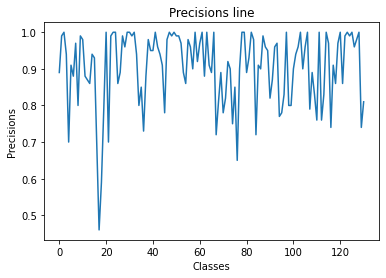

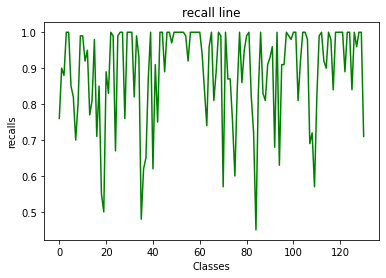

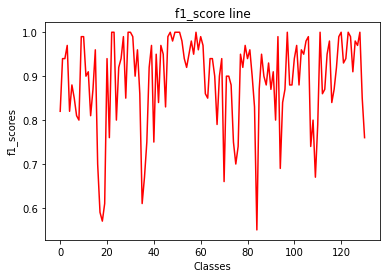

In [64]:
plt.plot(precisions)
plt.ylabel('Precisions')
plt.xlabel('Classes')
plt.title('Precisions line')
plt.show()

plt.plot(recalls, 'g')
plt.ylabel('recalls')
plt.xlabel('Classes')
plt.title('recall line')
plt.show()

plt.plot(f1_scores, 'r')
plt.ylabel('f1_scores')
plt.xlabel('Classes')
plt.title('f1_score line')
plt.show()

In [65]:
samples_count = np.array([])

for i in range(0,131):
    samples_count = np.append(samples_count, [0])

for i in range(0, y_train.size):
    samples_count[y_train[i]] += 1
samples_count


array([492., 444., 480., 492., 481., 492., 456., 492., 492., 429., 490.,
       492., 672., 492., 427., 491., 490., 450., 490., 450., 462., 490.,
       492., 492., 490., 702., 492., 738., 738., 492., 492., 492., 450.,
       490., 490., 450., 462., 392., 468., 490., 468., 702., 297., 490.,
       984., 492., 490., 490., 492., 471., 490., 492., 490., 464., 490.,
       490., 466., 471., 490., 492., 490., 490., 490., 490., 490., 426.,
       300., 490., 738., 492., 492., 480., 654., 534., 450., 445., 438.,
       479., 492., 490., 492., 738., 492., 492., 696., 490., 702., 300.,
       490., 666., 711., 490., 490., 444., 702., 666., 666., 492., 492.,
       490., 493., 490., 447., 420., 900., 492., 450., 450., 453., 450.,
       450., 490., 492., 490., 492., 490., 492., 738., 490., 490., 738.,
       672., 738., 479., 492., 684., 367., 474., 459., 735., 475.])

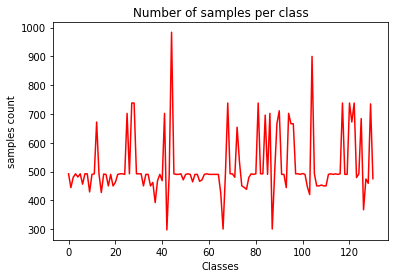

In [66]:
plt.plot(samples_count, 'r')
plt.ylabel('samples count')
plt.xlabel('Classes')
plt.title('Number of samples per class')
plt.show()

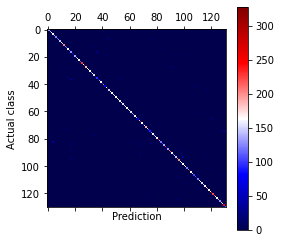

In [67]:
# CONFUSION MATRIX
from sklearn.metrics import confusion_matrix  

predict_test = joblib.load('tam/predict_test_best_parameter')
y_test = joblib.load('tam/y_test')
conf_mat_rf = confusion_matrix(y_test, predict_test) # row: actual class, col: prediction
let_plot = True;
if let_plot:
   plt.matshow(conf_mat_rf, cmap=plt.cm.seismic)
   plt.xlabel("Prediction")
   plt.ylabel("Actual class")
   plt.colorbar()
   plt.savefig("figs/confusion_matrix_plot")
   plt.show()


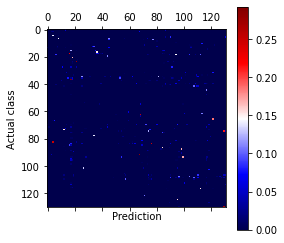

In [68]:
#Random forest
row_sums = conf_mat_rf.sum(axis=1, keepdims=True)
norm_conf_mat_rf = conf_mat_rf / row_sums
# Replace rates on diagonal (correct classifitions) by zeros    
if let_plot:
   np.fill_diagonal(norm_conf_mat_rf, 0)
   plt.matshow(norm_conf_mat_rf,cmap=plt.cm.seismic)
   plt.xlabel("Prediction")
   plt.ylabel("Actual class")
   plt.colorbar()
   #plt.savefig("figs/confusion_matrix_errors_plot", tight_layout=False)
   plt.show()

In [69]:
err_arr = np.array([])

for i in range(0,131):
    for j in range(0,130):
        if norm_conf_mat_rf[i][j] > 0.25:
            err = {
                norm_conf_mat_rf[i][j],
                i,
                j
            }
            err_arr = np.append(err_arr, [err])
print("Các class có tỉ lệ lỗi trên 0.25:")
print(err_arr)

Các class có tỉ lệ lỗi trên 0.25:
[{0.2710843373493976, 24, 21} {0.2923076923076923, 17, 37}
 {0.25301204819277107, 68, 63} {0.27710843373493976, 67, 92}
 {0.2611464968152866, 129, 130}]


In [70]:
# 8.4. Plot examples of 3s and 5s
import matplotlib as mpl
def plot_digits(instances, images_per_row=10, **options):
   size = 45
   images_per_row = min(len(instances), images_per_row)
   images = [instance.reshape(size,size) for instance in instances]
   n_rows = (len(instances) - 1) // images_per_row + 1
   row_images = []
   n_empty = n_rows * images_per_row - len(instances)
   images.append(np.zeros((size, size * n_empty)))
   for row in range(n_rows):
       rimages = images[row * images_per_row : (row + 1) * images_per_row]
       row_images.append(np.concatenate(rimages, axis=1))
   image = np.concatenate(row_images, axis=0)
   plt.imshow(image, cmap = mpl.cm.binary, **options)
   plt.axis("off")

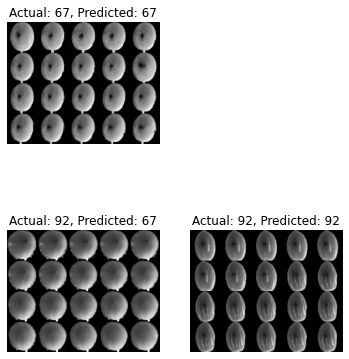

In [71]:
class_A = 67
class_B = 92
X_class_AA = X_test[(y_test == class_A) & (predict_test == class_A)]
X_class_AB = X_test[(y_test == class_A) & (predict_test == class_B)]
X_class_BA = X_test[(y_test == class_B) & (predict_test == class_A)]
X_class_BB = X_test[(y_test == class_B) & (predict_test == class_B)] 

if let_plot:
   plt.figure(figsize=(6,7))
   plt.subplot(221); plot_digits(X_class_AA[0:20], images_per_row=5)
   plt.title("Actual: " + str(class_A) + ", Predicted: " + str(class_A))
#    plt.subplot(222); plot_digits(X_class_AB[0:20], images_per_row=5)
#    plt.title("Actual: " + str(class_A) + ", Predicted: " + str(class_B))
   plt.subplot(223); plot_digits(X_class_BA[0:20], images_per_row=5)
   plt.title("Actual: " + str(class_B) + ", Predicted: " + str(class_A))
   plt.subplot(224); plot_digits(X_class_BB[0:20], images_per_row=5)
   plt.title("Actual: " + str(class_B) + ", Predicted: " + str(class_B))
   plt.show()


In [72]:
print('Predict and actual results:')
print(predict_test[15],predict_test[1000],predict_test[2000],predict_test[3650],predict_test[9000],predict_test[12000],predict_test[16000],predict_test[19000],predict_test[2300],predict_test[2600],predict_test[3000])
print(y_test[15],y_test[1000],y_test[2000],y_test[3650],y_test[9000],y_test[12000],y_test[16000],y_test[19000],y_test[2300],y_test[2600],y_test[3000])

Predict and actual results:
0 6 12 22 53 71 18 110 14 15 40
0 6 12 22 53 71 94 110 14 15 18


In [73]:
from sklearn.metrics import accuracy_score
test_accuracy_score = accuracy_score(y_test, predict_test)
joblib.dump(test_accuracy_score, 'test_accuracy_score')
print("Accuracy score on test set:")
print(test_accuracy_score)

Accuracy score on test set:
0.8945257404795487
